##Introducción
El análisis y predicción del incumplimiento de préstamos es fundamental para las instituciones financieras en la gestión del riesgo crediticio. La capacidad de identificar con precisión los préstamos que tienen mayor probabilidad de incumplir permite a los prestamistas tomar decisiones más informadas y mitigar posibles pérdidas. En este contexto, el presente trabajo se enfoca en explorar un conjunto de datos relacionado con préstamos y construir un modelo de clasificación para predecir si un prestatario caerá en incumplimiento o no.

## Descripción del Problema

El incumplimiento de préstamos representa un riesgo significativo para las instituciones financieras, ya que puede resultar en pérdidas financieras y afectar su estabilidad y solidez. Identificar los factores que influyen en el incumplimiento de préstamos y desarrollar modelos predictivos precisos es crucial para tomar decisiones fundamentadas en la gestión del riesgo crediticio. En este sentido, el análisis de datos y la construcción de modelos de clasificación pueden proporcionar insights valiosos para mejorar la evaluación de riesgos y la toma de decisiones crediticias.

## Objetivo

El objetivo principal de este trabajo es construir un modelo de clasificación que pueda predecir si un prestatario caerá en incumplimiento o no. Para lograr este objetivo, se explorará un conjunto de datos relacionado con préstamos, se realizará un análisis exploratorio de los datos para comprender mejor las características y los patrones presentes en ellos, y se construirá y evaluará el rendimiento de varios modelos de clasificación.


## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/yasserh/loan-default-dataset

Este conjunto de datos proporciona información detallada sobre préstamos, incluidos atributos como límite de préstamo, género del prestatario, tipo de préstamo, propósito del préstamo, solvencia crediticia, entre otros. El uso de estos datos permitirá realizar un análisis exhaustivo y construir un modelo predictivo robusto para la predicción del incumplimiento de préstamos.

## Importación de Librerías y Carga de Datos


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gdown
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
# Modelos
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
def download_and_read_csv_from_google_drive(file_id):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    csv_path = "./data.csv"

    # Descargar el archivo directamente usando gdown
    gdown.download(url, csv_path, quiet=False)

    # Leer el CSV descargado
    df = pd.read_csv(csv_path)
    return df

In [ ]:
# ID del archivo de Google Drive
file_id = "11xgi6MWxTKszdbBFhDMwxprfVPWIGRkW"

In [ ]:
df = download_and_read_csv_from_google_drive(file_id)

Downloading...
From: https://drive.google.com/uc?export=download&id=11xgi6MWxTKszdbBFhDMwxprfVPWIGRkW
To: /content/data.csv
100%|██████████| 28.5M/28.5M [00:00<00:00, 58.1MB/s]


## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [ ]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

#### 1. **Cantidad de registros**
- El dataset contiene un total de **148,670 registros**, lo que proporciona una base de datos bastante amplia para el análisis y modelado.

#### 2. **Tipos de datos**
- **Numéricos**:
  - 8 columnas de tipo `float64` (por ejemplo, `rate_of_interest`, `property_value`, `income`).
  - 5 columnas de tipo `int64` (por ejemplo, `ID`, `year`, `loan_amount`).
  
- **Categóricos**:
  - 21 columnas de tipo `object` (por ejemplo, `Gender`, `loan_type`, `Credit_Worthiness`, `Region`).

#### 3. **Valores nulos**
- Varias columnas presentan valores nulos, siendo las más destacadas:
  - `loan_limit`: 3,344 registros con valores nulos.
  - `rate_of_interest`: 36,439 registros con valores nulos.
  - `Interest_rate_spread`: 36,639 registros con valores nulos.
  - `Upfront_charges`: 39,642 registros con valores nulos.
  - `property_value`: 15,098 registros con valores nulos.
  - `income`: 9,150 registros con valores nulos.
  - `LTV`: 15,098 registros con valores nulos.
  - `dtir1`: 24,121 registros con valores nulos.
  - Las columnas con valores nulos deberían ser tratadas para evitar que afecten el análisis o el modelado predictivo (por ejemplo, mediante imputación o eliminación).

#### 4. **Variable objetivo (Status)**
- La variable objetivo es **`Status`**, de tipo `int64`, y es **binaria (0/1)**.
  - **0** indica que no hubo incumplimiento en el crédito (no default).
  - **1** indica que hubo incumplimiento en el crédito (default).
  
  El balance de clases en esta variable será crucial para el modelado, ya que en muchos casos los modelos predictivos pueden verse sesgados hacia la clase mayoritaria (en este caso, los registros con **0**).

#### 5. **Conclusión preliminar**
- Es importante realizar un análisis más detallado de las columnas con valores nulos para determinar si se deben imputar o eliminar.
- La variable `Status` es crucial para la predicción del default, y dado que es binaria, podría requerir técnicas de balanceo de clases si está desbalanceada.
- Dado el número de columnas categóricas, sería necesario considerar una adecuada codificación de estas variables antes de incluirlas en modelos de machine learning.


In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


### Generalidades
- El dataset tiene un total de **148,670 registros**, todos del año 2019 (year).
- Las variables están correctamente escaladas y no presentan valores extremos no esperados (salvo algunas observaciones que detallamos a continuación).

#### Análisis de variables numéricas

1. **loan_amount (monto del préstamo)**:
   - Promedio: 331,117.
   - Rango: Desde 16,500 hasta 3,576,500.
   - Se observa una dispersión moderada con un desvío estándar de 183,909, lo que indica que hay préstamos significativamente grandes.

2. **rate_of_interest (tasa de interés)**:
   - Promedio: 4.05%, con un rango de 0% a 8%.
   - La mediana es de 3.99%, lo que indica que la distribución es bastante simétrica en torno a la media.

3. **Interest_rate_spread (diferencial de tasa de interés)**:
   - Promedio: 0.44, con valores entre -3.64 y 3.36.
   - Aunque la mayoría de los valores parecen razonables, los valores negativos podrían requerir validación para descartar errores.

4. **Upfront_charges (cargos iniciales)**:
   - Promedio: 3,224, con un rango de 0 a 60,000.
   - Los valores en el percentil 75 (4,812) sugieren que la mayoría de los registros están en un rango más razonable, pero existen valores extremos altos.

5. **property_value (valor de la propiedad)**:
   - Promedio: 497,893.
   - El rango varía desde 8,000 hasta 16,508,000, lo que incluye propiedades de muy alto valor que podrían ser atípicas.

6. **income (ingreso del cliente)**:
   - Promedio: 6,957, con un rango que va de 0 a 578,580.
   - Los valores bajos (incluso 0) podrían corresponder a ingresos no reportados o errores.

7. **Credit_Score (puntuación crediticia)**:
   - Promedio: 699, con valores entre 500 y 900.
   - La distribución muestra un rango razonable para este tipo de datos, con la mayoría de los valores concentrados entre 599 y 800.

8. **LTV (relación préstamo-valor)**:
   - Promedio: 72.75%, con un rango de 0.96% a 7,831%.
   - Los valores extremadamente altos (>100%) podrían ser casos atípicos o requerir validación.

9. **dtir1 (relación deuda-ingreso)**:
   - Promedio: 37.73, con un rango de 5 a 61.
   - Los valores están dentro de un rango esperado para esta métrica.

#### Observaciones generales
- **Valores extremos**: Algunas variables (Upfront_charges, property_value, LTV) presentan valores significativamente altos que podrían considerarse outliers y deberían analizarse más a fondo.
- **Distribuciones**: Variables como loan_amount y rate_of_interest parecen tener distribuciones razonables con poca asimetría.
- **Datos faltantes**: Algunas columnas como rate_of_interest y income tienen datos faltantes que pueden impactar los análisis predictivos.

## Preprocesamiento de Datos


En esta sección, realizamos tareas de limpieza y preparación de datos para que estén listos para la construcción de modelos.

- Manejo de Valores Faltantes: Identificar y tratar los valores faltantes en las columnas relevantes.
- Codificación de Variables Categóricas: Convertir variables categóricas en formato numérico (por ejemplo, one-hot encoding).
- Normalización/Estandarización: Realizar normalización o estandarización si es necesario.
- Selección de Características: Seleccionar las características más relevantes si es necesario.

## Funciones de preprocesamiento

### Outliers

In [ ]:
def calcular_outliers_iqr(df):
    """
    Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame con columnas numéricas y su porcentaje de outliers,
                      ordenadas en orden decreciente.
    """
    resultados = []

    for columna in df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if df[columna].nunique() == 2:
            continue

        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

### Valores nulos

In [ ]:
def calcular_porcentaje_nulos(df):
    """
    Calcula el porcentaje de valores nulos por columna y devuelve las columnas
    con valores nulos en orden decreciente según el porcentaje.

    Args:
    df (pd.DataFrame): DataFrame a analizar.

    Returns:
    pd.DataFrame: DataFrame con columnas `columna` y `porcentaje_nulos`.
    """
    # Calcular porcentaje de nulos
    porcentaje_nulos = df.isnull().mean() * 100

    # Filtrar columnas con nulos y ordenar en orden decreciente
    nulos_df = (porcentaje_nulos[porcentaje_nulos > 0]
                .sort_values(ascending=False)
                .reset_index())
    nulos_df.columns = ['columna', 'porcentaje_nulos']

    return nulos_df

In [ ]:
def imputar_valores_nulos(data, columnas_outliers):
    """
    Imputa los valores nulos en el DataFrame según las reglas especificadas:
    - Para las variables numéricas:
        - Si no tiene outliers, se imputa con la media.
        - Si tiene outliers, se imputa con la mediana.
    - Para las variables categóricas, se imputa con la moda.

    Parámetros:
        data (pd.DataFrame): El DataFrame de entrada con los valores nulos.
        columnas_outliers (list): Lista con los nombres de las columnas con outliers.

    Devuelve:
        pd.DataFrame: El DataFrame con los valores nulos imputados.
    """
    for col in data.columns:
        if data[col].dtype == 'object':  # Categóricas
            # Imputar con la moda para columnas categóricas
            moda = data[col].mode()[0]
            data[col] = data[col].fillna(moda)

        else:  # Numéricas
            if col in columnas_outliers:
                # Imputar con la mediana si la columna tiene outliers
                mediana = data[col].median()
                data[col] = data[col].fillna(mediana)
            else:
                # Imputar con la media si la columna no tiene outliers
                media = data[col].mean()
                data[col] = data[col].fillna(media)

    return data

### Eliminamos columnas irrelevantes

In [ ]:
def eliminar_columnas_irrelevantes(data):
    """
    Elimina columnas irrelevantes del DataFrame.
    - Elimina columnas con un solo valor.
    - Elimina columnas específicas como 'id' y 'year'.

    Parámetros:
        data (pd.DataFrame): El DataFrame que contiene las variables a procesar.

    Devuelve:
        pd.DataFrame: El DataFrame con las columnas irrelevantes eliminadas.
    """
    # Eliminar columnas con un solo valor
    columnas_a_eliminar = [col for col in data.columns if len(data[col].unique()) == 1]

    # Eliminamos las columnas del DataFrame
    data = data.drop(columns=columnas_a_eliminar, axis=1)

    return data

### Encoding y normalizado

In [ ]:
def preprocesar_data(data):
    """
    Función para preprocesar los datos.
    - Realiza One Hot Encoding en variables categóricas con <= 8 categorías.
    - Realiza Label Encoding en variables categóricas con > 8 categorías.
    - Normaliza las variables numéricas entre 0 y 1.
    """
    # Inicializamos los transformadores
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # Cambié sparse a sparse_output
    label_encoder = LabelEncoder()
    scaler = MinMaxScaler()

    # Variables categóricas y numéricas
    categorias = data.select_dtypes(include=['object']).columns
    numericas = data.select_dtypes(exclude=['object']).columns

    # Aplicamos One Hot Encoding o Label Encoding según corresponda
    for col in categorias:
        if data[col].nunique() <= 8:
            encoded = onehot_encoder.fit_transform(data[[col]])
            encoded_df = pd.DataFrame(
                            encoded,
                            columns=onehot_encoder.get_feature_names_out([col]),
                            index=data.index  # usa el mismo índice que X_train
                          )
            data = pd.concat([data, encoded_df], axis=1)
            data.drop(columns=[col], inplace=True)
        else:
            data[col] = label_encoder.fit_transform(data[col])

    # Normalizamos las variables numéricas
    # Inicializar los escaladores
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    # Iterar sobre las columnas numéricas y aplicar el escalado apropiado
    for col in numericas:
        # Calcular skewness de la columna
        skewness = skew(df[col].dropna())  # Ignorar valores NaN si los hay

        # Escalar dependiendo del skewness
        if abs(skewness) > 1:
            # Si el skewness es alto, usamos MinMaxScaler
            data[col] = minmax_scaler.fit_transform(data[[col]])
        else:
            # Si el skewness es bajo, usamos StandardScaler
            data[col] = standard_scaler.fit_transform(data[[col]])

    return data

## Construcción de Modelos


En esta sección, construimos modelos de clasificación utilizando el conjunto de datos preparado.

- Selección de Algoritmos: Elegir algoritmos de clasificación adecuados (por ejemplo, Regresión Logística, Random Forest, SVM).
- Entrenamiento de Modelos: Entrenar modelos utilizando el conjunto de entrenamiento.
- Ajuste de Hiperparámetros: Ajustar hiperparámetros para optimizar el rendimiento de los modelos.

In [ ]:
semilla = 142857

In [ ]:
# X será todo menos la columna 'Status' (la target)
X = df.drop(columns=['Status'])

# y será la columna 'Status' (la target)
y = df['Status']

# Realizamos el split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (104069, 31)
Tamaño de X_test: (44601, 31)
Tamaño de y_train: (104069,)
Tamaño de y_test: (44601,)


Para garantizar la validez del modelo, todas las transformaciones deben aprenderse **exclusivamente a partir del conjunto de entrenamiento** (*train*), y luego aplicarse al conjunto de prueba (*test*).  
Esto evita que el modelo “vea” información del test antes de ser evaluado.

El flujo aplicado es el siguiente:

1. **División inicial:**  
   Primero se separan los datos en `X_train` y `X_test` (junto con `y_train` y `y_test`), antes de realizar cualquier imputación, escalado o codificación.

2. **Procesamiento del conjunto de entrenamiento:**  
   - Se identifican y tratan *outliers* en el train.  
   - Se imputan valores nulos (calculando medias, medianas o modas solo con el train).  
   - Se ajustan (fit) los encoders y escaladores usando exclusivamente el train.  
   - Se transforman (transform) los datos del train.

3. **Procesamiento del conjunto de prueba:**  
   - Se aplican al test exactamente los mismos parámetros aprendidos en el train:  
     - Los mismos valores de imputación (medias, medianas, modas).  
     - Los mismos *encoders* ya ajustados.  
     - Los mismos escaladores (misma media, desviación o rango del train).  

De esta manera, **no se produce fuga de información (*data leakage*)**, y la evaluación del modelo refleja su desempeño real frente a datos nuevos.


In [ ]:
outliers_df = calcular_outliers_iqr(X_train)
columnas_outliers = outliers_df['Columna'].tolist()

In [ ]:
X_train = imputar_valores_nulos(X_train, columnas_outliers)

In [ ]:
valores_imputacion = {}

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        valores_imputacion[col] = X_train[col].mode()[0]
    elif col in columnas_outliers:
        valores_imputacion[col] = X_train[col].median()
    else:
        valores_imputacion[col] = X_train[col].mean()

for col, valor in valores_imputacion.items():
    if col in X_test.columns:
        X_test[col] = X_test[col].fillna(valor)

In [ ]:
columnas_a_eliminar = ['ID', 'year']
X_train = X_train.drop(columns=[c for c in columnas_a_eliminar if c in X_train.columns], axis=1)
X_test = X_test.drop(columns=[c for c in columnas_a_eliminar if c in X_test.columns], axis=1)

In [ ]:
def preprocesar_train(data):
    return preprocesar_data(data)

In [ ]:
def preprocesar_test(data_train, data_test):
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
    from scipy.stats import skew

    data = data_test.copy()
    categorias = data_train.select_dtypes(include=['object']).columns
    numericas = data_train.select_dtypes(exclude=['object']).columns

    for col in categorias:
        if data_train[col].nunique() <= 8:
            encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
            encoder.fit(data_train[[col]])
            encoded = encoder.transform(data[[col]])
            encoded_df = pd.DataFrame(
                encoded,
                columns=encoder.get_feature_names_out([col]),
                index=data.index
            )
            data = pd.concat([data, encoded_df], axis=1)
            data.drop(columns=[col], inplace=True)
        else:
            le = LabelEncoder()
            le.fit(data_train[col])
            data[col] = data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    for col in numericas:
        if col not in data.columns:
            continue
        skewness = skew(data_train[col].dropna())
        if abs(skewness) > 1:
            minmax_scaler.fit(data_train[[col]])
            data[col] = minmax_scaler.transform(data[[col]])
        else:
            standard_scaler.fit(data_train[[col]])
            data[col] = standard_scaler.transform(data[[col]])

    return data


In [ ]:
X_train_proc = preprocesar_train(X_train)

In [ ]:
X_test_proc = preprocesar_test(X_train, X_test)

In [ ]:
train_df = pd.concat([X_train_proc.reset_index(drop=True),
                      y_train.reset_index(drop=True)], axis=1)

In [ ]:
test_df  = pd.concat([X_test_proc.reset_index(drop=True),
                      y_test.reset_index(drop=True)], axis=1)

Ahora sí, pasamos a la parte de los modelos...

In [ ]:
# Creo DF para ir guardando los resultados
column_names = ["Modelo", "Accuracy", "Precision", "Recall", "ROCAUC", "F1-Score", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

In [ ]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):

    # Aquí calculamos las métricas de evaluación del modelo
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'ROCAUC': [rocauc],
        'F1-Score': [f1],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df

In [ ]:
def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='d',
                ax=ax[0],
                square=True, linewidth=1)
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum()
    sns.heatmap(conf_matrix_norm,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='.2%',
                ax=ax[1],
                square=True, linewidth=1)
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.show()

In [ ]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Mostramos la matriz de confusión
    matriz_confusion(y_test, y_pred)

In [ ]:
# Volvemos a separar features (X) y target (y)
X_train = train_df.drop(columns=['Status'])
y_train = train_df['Status']

X_test = test_df.drop(columns=['Status'])
y_test = test_df['Status']

#### Árbol de Decisión

In [ ]:
modelo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state = semilla)

/tmp/ipython-input-3731592988.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)


Resultados para el modelo: Árbol de Decisión
              Modelo  Accuracy  Precision  Recall  ROCAUC  F1-Score    Tiempo
0  Árbol de Decisión       1.0        1.0     1.0     1.0       1.0  0.302545 



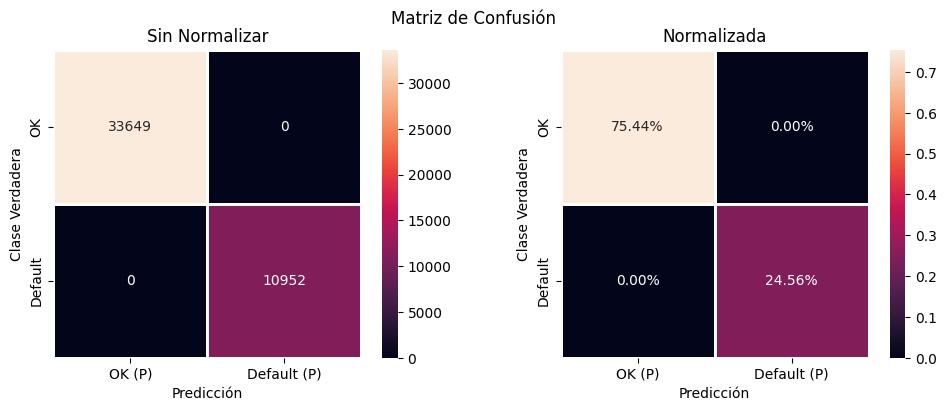

In [ ]:
entrenar_modelo(modelo, 'Árbol de Decisión', X_train, y_train, X_test, y_test)

#### Regresión Logística

In [ ]:
modelo = LogisticRegression(
    solver='liblinear',
    random_state=semilla)

Resultados para el modelo: Regresión Logística
                Modelo  Accuracy  Precision    Recall    ROCAUC  F1-Score  \
0  Regresión Logística   0.87016    0.92241  0.514518  0.750216  0.660571   

   Tiempo  
0  4.8851   



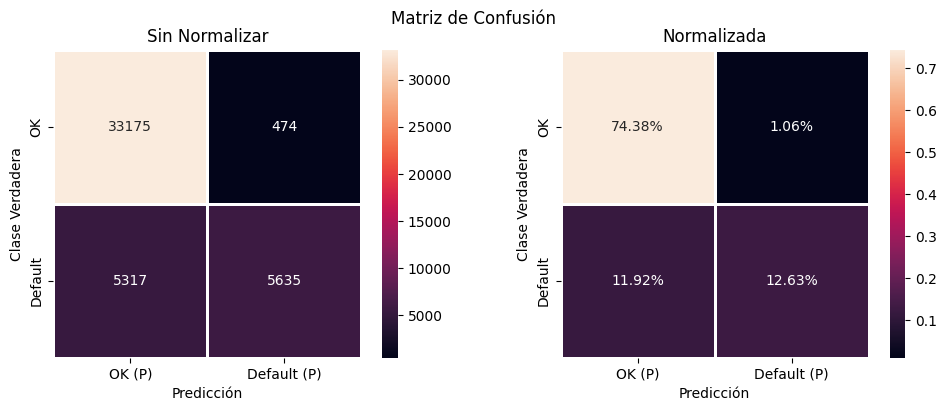

In [ ]:
entrenar_modelo(modelo, 'Regresión Logística', X_train, y_train, X_test, y_test)

#### Random Forest

In [ ]:
modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=semilla,
    class_weight='balanced'  # Si hay desbalance de clases
)

Resultados para el modelo: Random Forest
          Modelo  Accuracy  Precision  Recall    ROCAUC  F1-Score    Tiempo
0  Random Forest  0.999978   0.999909     1.0  0.999985  0.999954  7.742836 



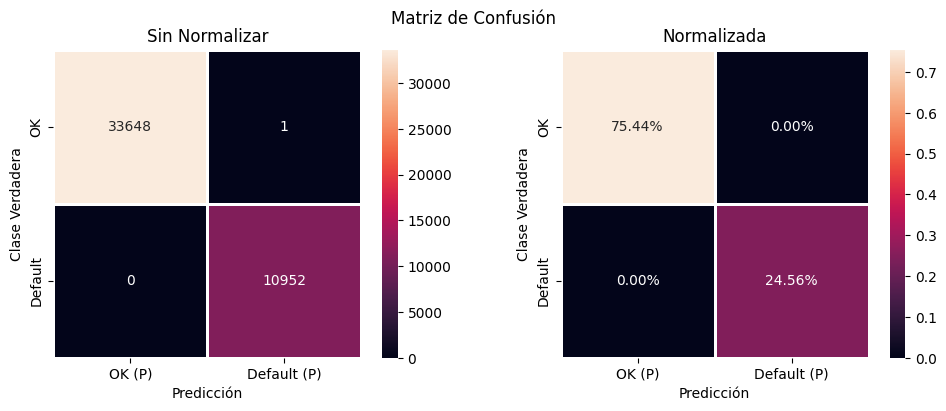

In [ ]:
entrenar_modelo(modelo, 'Random Forest', X_train, y_train, X_test, y_test)

## Conclusiones


*En* esta sección, resumimos los resultados y conclusiones clave del proyecto.

- Resumen de Resultados: Resumir los hallazgos y resultados.
- Cumplimiento del Objetivo: Evaluar si el modelo cumple con el objetivo de predecir incumplimientos de préstamos.

In [ ]:
resultados_df

,Modelo,Accuracy,Precision,Recall,ROCAUC,F1-Score,Tiempo
0,Árbol de Decisión,1.000000,1.000000,1.000000,1.000000,1.000000,0.302545
1,Random Forest,0.999978,0.999909,1.000000,0.999985,0.999954,7.742836
2,Regresión Logística,0.870160,0.922410,0.514518,0.750216,0.660571,4.885100


## Recomendaciones y Siguientes Pasos


1. **Buscar más datos**: Ampliar el conjunto de datos puede mejorar la generalización de los modelos y reducir el sobreajuste, especialmente en modelos como la regresión logística.
   
2. **Balanceo de clases**: Dado que la variable objetivo es binaria y puede haber un desbalance entre las clases, se recomienda aplicar técnicas de balanceo como SMOTE o undersampling para mejorar el desempeño en recall.

3. **Cross-validation**: Implementar validación cruzada para evaluar la estabilidad de los modelos y evitar el sobreajuste en un conjunto de datos limitado.

4. **Análisis de Importancia de Características**: Realizar un análisis de la importancia de las características para identificar qué variables tienen mayor impacto en las predicciones, lo que puede ayudar a mejorar el modelo o a simplificarlo.

5. **Ajuste de Hiperparámetros**: Realizar una búsqueda de hiperparámetros (grid search o random search) para optimizar el rendimiento de los modelos, especialmente en Random Forest y Árbol de Decisión.

6. **Pruebas con modelos adicionales**: Considerar probar otros modelos como XGBoost, LightGBM o redes neuronales para comparar su rendimiento y ver si se pueden obtener mejores resultados.